Qual a Função desejada? Entre '1' para casa ou '2' para v: 1
[-10.          -9.989995    -9.97998999 ...   9.97998999   9.989995
  10.        ]
2000


<ipython-input-240-c0592111f221>:137: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


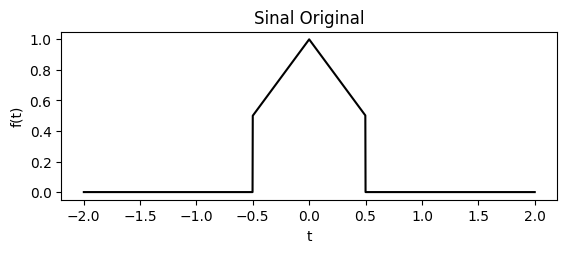

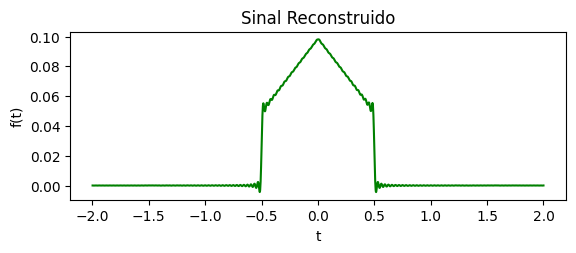

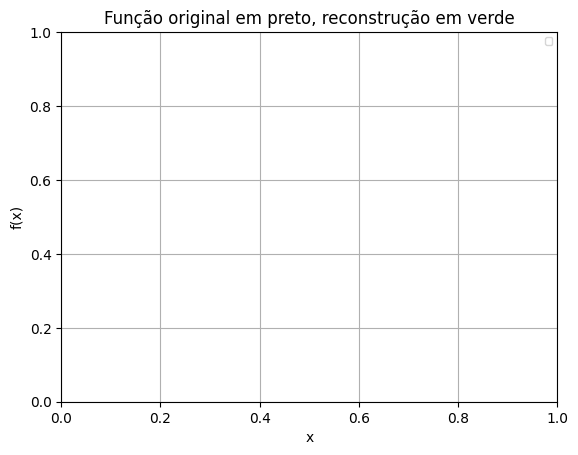

Precisão pela norma: 0.9015239870509633
Precisão pela energia: 0.009712589002470188


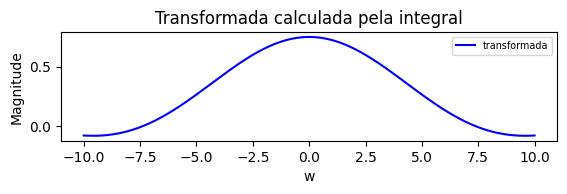

In [ ]:
#Kenner Marqueti Couto
#Trabalho de Transformada de Fourrier

#Materiais de Apoio
#
#
#
#

import numpy as np
from math import e
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from numpy import pi
from numpy import diff


############  Definindo Funções  ############

L = 1 # preíodo padrão, pode ser redefinido posteriormente

def calcenergia(f, x):
  f2=np.abs(f)**2
  energia = np.trapz(f2,x)
  return energia


def q1( x, height = 1, length = 1 ): #### Função da questão 1
    y = [] #cria vetor vazio

    for t in x:   #calculo dos valores de cada ponto
        if ( np.abs(t) > length/2):
            y.append(0) # se fora do intervalo -t/2;t/2, valor de f(x) é zero
        else:
            y.append( height - np.abs(t) ) # grava valor do ponto e adiciona ao vetor

    # retorna o vetor de pontos calculados
    return np.asarray(y)


def q2(x,displacement = -1, length = 3):
    y = [] #cria vetor vazio

    for t in x:   #calculo dos valores de cada ponto
        if ( np.abs(t+displacement) > length/2):
            y.append(0) # # se fora do intervalo valor de f(x) é zero
        else:
            y.append( np.abs(t) ) # y = módulo de t

    # retorna vetor de pontos
    return np.asarray(y)

def q2t(w):
    y=[]
    w= w*(2*pi)
    y = (0.5-(1/2)*np.sinc(w/2)*e**(-1j*w/2)+np.sinc(2.5/2)*e**(-1.25*1j*w))/(1j*w)
    return np.asarray(y)




def slowft(vetor,t,omega):
    #omega = np.linspace( -10, 10, len(t) )
    #print(omega)
    slow = []
    for w in omega:
      #f =vetor * np.exp(-1j* w * t)
      slow.append( np.trapz (vetor * np.exp(-1j* w * t),t)) #calcula ponto a ponto a integral através da regra do trapézio e armazena no vetor
    return slow
########################  Definindo passo de cálculo, período da função e criando eixo x  #################################################################################

# Pergunta ao usuário função desejada
choice = input("Qual a Função desejada? Entre '1' para casa ou '2' para v: ")

# Define f based on user's choice
if choice == '2':
    dx = 0.001
    L = 3
    x = L * np.arange(-1+dx,1+dx,dx)
    f = np.zeros_like(x)
    f = q2(x)
elif choice == '1':
    dx = 0.001
    L = 2
    x = L * np.arange(-1+dx,1+dx,dx)
    f = np.zeros_like(x)
    f = q1(x)

else:
    L = 6
    print('voce não deveria estar aqui')
    dx = 0.001
    x = L * np.arange(-1+dx,1+dx,dx)
    f = np.zeros_like(x)
    print("Escolha inválida. Utilizando onda trapezoidal.")
    f = trapeze_wave(x,-2)

########################    HARMONICAS E VETORES     ################################################################################################################################

# definindo a derivada calculada na mão
def der1(t):
    return np.heaviside(t + 0.5, 1) + np.heaviside(t - 0.5, 1) - 2 * np.heaviside(t, 1)

#calculo da transformada

eixoomega = np.fft.fftfreq(len(f), 0.2)
lenx = len(x)
transf1 = sp.fft.fft(f,lenx)
revtransf = sp.fft.ifft(transf1)


omega = np.linspace(-10,10,len(x))
print(omega)




# Create a line plot
# plt.plot(x,np.real(fFS),color='b',label= ("Fourier com %d harmônicas" % harm))
print (len(f))
df = np.diff (f)/(dx*L)
dmf1 = der1(x) #derivada manual da função 1
#print (len(df))
d2f = diff (df)/(dx*L)
plt.ylim(-2,5)
aiai = np.linspace(-200,200,len(x))
transformei = slowft(f,x,aiai)
vamo = (1/2*np.pi)*np.real(slowft(transformei,x,aiai))
vamo = np.flip(vamo)
precisaoe = calcenergia(vamo,x)/calcenergia(f,x)

# Calculo da precisão
precisaon = np.linalg.norm(f - vamo) / np.linalg.norm(f)
## calculando exatidao

plt.subplot(2, 1, 2)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Sinal Original')
plt.plot(x,f,color='k',label= ("Função original"))
plt.show()

plt.subplot(2, 1, 2)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Sinal Reconstruido')
plt.plot (x,vamo,color='g',label= ("reconstrução"))
plt.show()


# Customize the plot
#plt.figure(figsize=(8, 6))
plt.xlabel('x')
plt.ylabel('f(x)')
#plt.xticks([-3,-2,-1,0,1,2,3])
plt.title('Função original em preto, reconstrução em verde')
plt.legend(loc='upper right', fontsize='x-small')
plt.grid()
# Display the plot
plt.show()

plt.subplot(3, 1, 3)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('Espectro de frequencia pela transformada convencional numérica')
plt.plot (omega,np.real(slowft(f,x,omega)),color='b',label= ("transformada"))
print("Precisão pela norma:", precisaon)
print("Precisão pela energia:", precisaoe)


plt.title('Transformada calculada pela integral')
#plt.plot (omega,np.real(q2t(omega)),color='r',label= ("transformada manual"))
#plt.plot (omega,np.real(np.sinc(pi*omega)),color='g',label= ("sinc"))
plt.legend(loc='upper right', fontsize='x-small')
plt.show();

####################################################################################################################################################################################
#Questão 3 depois dos gráficos





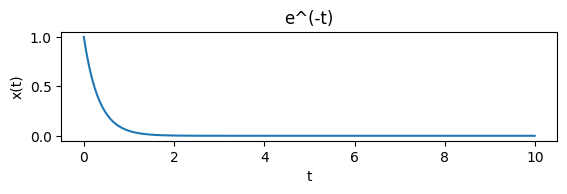

0.1667166636669238
1
2
3
4
5
6
7
8
77.1 % da Energia Original com 9 harmônicas
0.13572980293884196


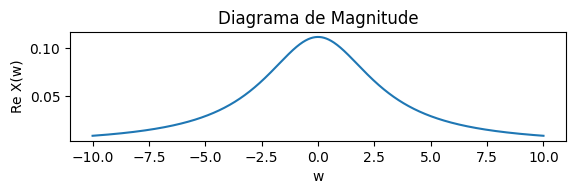

In [ ]:
######################## Questão 3 ########################

# O sinal é x(t) = e^^(-at)*u(t)
#x²(t) = e^(-2at)*u(t)
#para simplificação do código, como a é uma constante durante os cálculos
#omitiremos esta do sinal, caso deseje-se utilizá-la, deve-se executar simples
#modificação


def slowft(vetor,t,omega):
    #omega = np.linspace( -10, 10, len(t) )
    #print(omega)
    slow = []
    for w in omega:
      #f =vetor * np.exp(-1j* w * t)
      slow.append( np.trapz (vetor * np.exp(-1j* w * t),t)) #calcula ponto a ponto a integral através da regra do trapézio e armazena no vetor
    return slow


def energiateste(vetor,t,energia_base,alvo):  # Calcula a energia de um sinal à partir de sua transformada para n=1 harmônicas e compara o resultado obtido com energia_base*alvo, caso o resultado seja menor, incrementa harmônica em 1 e repete
    harm = 1
    energia = 0
    while energia<energia_base*alvo :
        w =[]
        w = np.linspace( -harm, harm, len(t) )  #cria eixo w de -harmonicas até harmonicas, garantindo q este tenha o mesmo número de elementos que o eico t
        print(harm)
        transf = slowft(vetor,t,w)  #calcula a transformada de fourier numericamente do vetor
        energia = (1/(2*np.pi))*np.trapz(np.abs(transf)**2,w) #calcula a energia, neste caso à partir da transformada previamente calculada
        harm+=1
    print("{:3.1f}".format(energia/energia_base*100),
                  "% da Energia Original com", harm, "harmônicas")
    return transf


t = np.arange(0,10,0.01) #gerando domínio do sinal
sq3 = e**(-3*t) #cálculo da função nos pontos de t
sq32 = sq3**2  #cálculo do sinal ao quadrado


plt.subplot(3, 1, 3)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('e^(-t)')
plt.plot(t,sq3)
plt.show()
energiaq3 =np.trapz(sq32,t) #integra a função sq32 no eixo t
print (energiaq3)


######### transformando o sinal

limw = 10
w1 = np.linspace(-limw,limw,len(t))
q3w = slowft(sq3,t,w1)
q3w2 = (np.abs(q3w))**2
#print(w)



# print(q3w)
# print(q3w2)

##### calculando energia da transformada para conferir ##############

energiaw = (1/(2*np.pi))*np.trapz(np.real(q3w2),w1)

plt.subplot(3, 1, 3)
plt.xlabel('w')
plt.ylabel('Re X(w)')
plt.title('Diagrama de Magnitude')
plt.plot(w1,np.real(q3w2))
energiateste(sq3,t,energiaq3,0.75)
print(energiaw)